# 구별 메뉴 가격 점수화

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import pearsonr


In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [5]:
df = pd.read_csv('./data/데이터최종_리뷰제거.csv')

In [6]:
df = df.drop('Unnamed: 0', axis=1)
df.tail()

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수
4808,신기소,0.0,구로구,서울특별시 구로구 디지털로 300 2F 205-1호,일식,만원-2만원,2021-06-09,괜찮다,1,0.0,1.0,0.0
4809,무궁화대구탕,0.0,구로구,서울특별시 구로구 구로동로22길 12,기타,만원-2만원,2022-03-18,맛있다,1,1.0,0.0,0.0
4810,더제이케이키친박스,0.0,구로구,서울특별시 구로구 디지털로 288 대륭포스트타워 1차 1F,양식,만원-2만원,2017-07-01,맛있다,7,3.0,3.0,1.0
4811,포36거리,0.0,구로구,서울특별시 구로구 디지털로 288 대륭포스트,다국적음식,만원 미만,2018-10-09,맛있다,5,3.0,0.0,2.0
4812,하우돈곱창,0.0,구로구,서울특별시 구로구 공원로6나길 35-21,한식,만원-2만원,2019-08-28,괜찮다,5,3.0,2.0,0.0


In [7]:
df.reset_index(drop=True,inplace=True)
len(df)

4813

In [8]:
rate=(df['별점']*(df['맛있다수']/df['리뷰수'])) - 2*(df['별점']*(df['별로다수']/df['리뷰수']))
df['최종평점']=rate
df.head()

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,최종평점
0,도이칠란드 박,4.6,성북구,서울특별시 성북구 솔샘로6길 30-15 1F,다국적음식,만원-2만원,2022-07-04,맛있다,21,19.0,0.0,2.0,3.285714
1,뽀르께노 스페니쉬비스트로,4.6,성북구,서울특별시 성북구 동소문로6길 4-21 1F,다국적음식,만원-2만원,2022-07-22,맛있다,7,7.0,0.0,0.0,4.600000
2,공푸,4.5,성북구,서울특별시 성북구 삼선교로24길 29,중식,만원 미만,2022-07-07,별로,91,76.0,11.0,4.0,3.362637
3,성북동집,4.5,성북구,서울특별시 성북구 성북로24길 4,한식,만원-2만원,2022-07-28,맛있다,41,35.0,6.0,0.0,3.841463
4,계모임,4.5,성북구,서울특별시 성북구 보문로30라길 5-10 1F,한식,만원-2만원,5 일 전,맛있다,10,10.0,0.0,0.0,4.500000


In [11]:
df = df.where(df['가격대'] != '0').dropna()
df = df.where(df['가격대'] != '메뉴').dropna()
df = df.where(df['가격대'] != '주차 무료주차 가능').dropna()
df = df.where(df['가격대'] != '주차 주차공간없음').dropna()


df['가격대'].value_counts()#.index

 만원 미만      2133
 만원-2만원     1737
 2만원-3만원     493
 4만원 이상      241
 3만원-4만원     146
Name: 가격대, dtype: int64

In [12]:
len(df)

4750

In [ ]:
gu_list=['도봉구','노원구','강북구','은평구','종로구','성북구','동대문구','중랑구','서대문구',\
          '마포구','중구','용산구','성동구','광진구','강동구','송파구','강남구',\
          '강서구','양천구','영등포구','동작구','서초구','관악구','금천구','구로구']
test_df = pd.DataFrame(gu_list)

In [13]:
df.head()

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,최종평점
0,도이칠란드 박,4.6,성북구,서울특별시 성북구 솔샘로6길 30-15 1F,다국적음식,만원-2만원,2022-07-04,맛있다,21.0,19.0,0.0,2.0,3.285714
1,뽀르께노 스페니쉬비스트로,4.6,성북구,서울특별시 성북구 동소문로6길 4-21 1F,다국적음식,만원-2만원,2022-07-22,맛있다,7.0,7.0,0.0,0.0,4.600000
2,공푸,4.5,성북구,서울특별시 성북구 삼선교로24길 29,중식,만원 미만,2022-07-07,별로,91.0,76.0,11.0,4.0,3.362637
3,성북동집,4.5,성북구,서울특별시 성북구 성북로24길 4,한식,만원-2만원,2022-07-28,맛있다,41.0,35.0,6.0,0.0,3.841463
4,계모임,4.5,성북구,서울특별시 성북구 보문로30라길 5-10 1F,한식,만원-2만원,5 일 전,맛있다,10.0,10.0,0.0,0.0,4.500000


In [52]:
a=df['가격대']==' 만원 미만'
b=df['가격대']==' 만원-2만원'
c=df['가격대']==' 2만원-3만원'
d=df['가격대']==' 3만원-4만원'
e=df['가격대']==' 4만원 이상'

In [53]:
a = df[a]
b = df[b]
c = df[c]
d = df[d]
e = df[e]

In [54]:
under10000 = a['구'].value_counts()
under20000 = b['구'].value_counts()
under30000 = c['구'].value_counts()
under40000 = d['구'].value_counts()
over40000 = e['구'].value_counts()

In [66]:
a = pd.DataFrame(under10000)
b = pd.DataFrame(under20000)
c = pd.DataFrame(under30000)
d = pd.DataFrame(under40000)
e = pd.DataFrame(over40000)

In [67]:
a = a.rename(columns={'구': '10000원 미만'})
a['구'] = a.index
a.set_index('구',inplace=True)

b = b.rename(columns={'구': '20000원 미만'})
b['구'] = b.index
b.set_index('구',inplace=True)

c = c.rename(columns={'구': '30000원 미만'})
c['구'] = c.index
c.set_index('구',inplace=True)

d = d.rename(columns={'구': '40000원 미만'})
d['구'] = d.index
d.set_index('구',inplace=True)

e = e.rename(columns={'구': '40000원 이상'})
e['구'] = e.index
e.set_index('구',inplace=True)

In [71]:
Fin_df= Fin_df.merge(e,left_index=True, right_index=True, how='outer')
# Fin_df = Fin_df.reset_index()
Fin_df.head()

,10000원 미만,20000원 미만,30000원 미만,40000원 미만,40000원 이상
구,,,,,
강남구,30,59,34,22.0,55.0
강동구,88,69,19,5.0,2.0
강북구,95,67,14,3.0,1.0
강서구,82,78,21,3.0,10.0
관악구,91,79,18,1.0,2.0


In [78]:
Fin_df = Fin_df.fillna(0)
Fin_df = Fin_df.astype('int')

In [82]:
Fin_df['맛집수'] = Fin_df['10000원 미만'] + Fin_df['20000원 미만'] + Fin_df['30000원 미만'] + Fin_df['40000원 미만'] + Fin_df['40000원 이상']

In [84]:
Fin_df['가격 점수'] = (Fin_df['10000원 미만'] + 2*Fin_df['20000원 미만'] + 3*Fin_df['30000원 미만'] + 4*Fin_df['40000원 미만'] + 5*Fin_df['40000원 이상']) / Fin_df['맛집수']

In [102]:
Fin_df

,10000원 미만,20000원 미만,30000원 미만,40000원 미만,40000원 이상,맛집수,가격 점수
구,,,,,,,
강남구,30,59,34,22,55,200,3.065000
강동구,88,69,19,5,2,183,1.710383
강북구,95,67,14,3,1,180,1.600000
강서구,82,78,21,3,10,194,1.871134
관악구,91,79,18,1,2,191,1.659686
광진구,102,76,12,4,4,198,1.646465
구로구,68,90,27,3,1,189,1.830688
금천구,87,71,11,2,4,175,1.657143
노원구,93,76,12,5,3,189,1.671958


In [87]:
Fin_df.to_csv('./data/가격점수DF.csv')

# 시각화

In [112]:
Fin_df['가격 점수']

구
강남구     3.065000
강동구     1.710383
강북구     1.600000
강서구     1.871134
관악구     1.659686
광진구     1.646465
구로구     1.830688
금천구     1.657143
노원구     1.671958
도봉구     1.500000
동대문구    1.484375
동작구     1.708333
마포구     1.979167
서대문구    1.601064
서초구     2.398990
성동구     1.786096
성북구     1.418848
송파구     2.075758
양천구     1.775401
영등포구    2.000000
용산구     2.424084
은평구     1.631868
종로구     2.045226
중구      2.363158
중랑구     1.633333
Name: 가격 점수, dtype: float64

In [117]:
# view_df = pd.DataFrame(Fin_df['가격 점수'])
# view_df['구'] = view_df.index
view_df.reset_index(inplace=True, drop=True)
view_df

,가격 점수,구
0,3.065000,강남구
1,1.710383,강동구
2,1.600000,강북구
3,1.871134,강서구
4,1.659686,관악구
5,1.646465,광진구
6,1.830688,구로구
7,1.657143,금천구
8,1.671958,노원구
9,1.500000,도봉구


In [118]:
x = view_df['가격 점수'].to_list()
y = view_df['구'].to_list()

<BarContainer object of 25 artists>

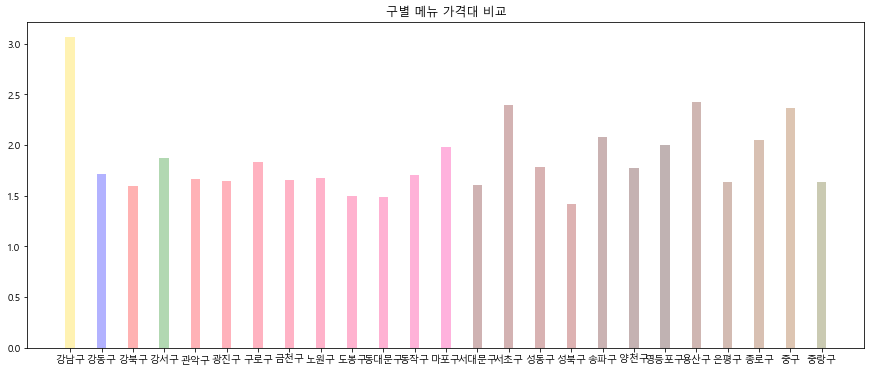

In [123]:
# y=view_df['가격 점수']
# x=view_df['구']

xlabel=x
plt.figure(figsize=(15,6))
plt.title('구별 메뉴 가격대 비교')
# x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19] #xticks 시 위치 표시에 사용할 변수
plt.bar(y,x, width=0.3, color = ['gold', 'b', '#FF0000', 'green','#FF0010','#FF0020','#FF0030',\
                                 '#FF0040','#FF0050','#FF0060','#FF0070','#FF0080','#FF0090',\
                                 '#600000','#700000','#800000','#900000','#500000','#400000','#300000',\
                                '#601000','#702000','#803000','#904000','#505000'], alpha = 0.3)